In [1]:
!pip install kaggle

In [2]:
#connecting with kaggle API key
import os
from google.colab import drive
drive.mount('/content/drive')

os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Kaggle'

Mounted at /content/drive


In [3]:
!kaggle datasets download yekenot/power-data-from-mesa-del-sol-microgrid

Dataset URL: https://www.kaggle.com/datasets/yekenot/power-data-from-mesa-del-sol-microgrid
License(s): CC0-1.0
100% 30.8M/30.8M [00:00<00:00, 81.6MB/s]
100% 30.8M/30.8M [00:00<00:00, 80.9MB/s]


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
!unzip /content/power-data-from-mesa-del-sol-microgrid.zip -d /content/power-data-from-mesa-del-sol-microgrid

Archive:  /content/power-data-from-mesa-del-sol-microgrid.zip
  inflating: /content/power-data-from-mesa-del-sol-microgrid/Apr_2023.csv  
  inflating: /content/power-data-from-mesa-del-sol-microgrid/Aug_2022.csv  
  inflating: /content/power-data-from-mesa-del-sol-microgrid/Dec_2022.csv  
  inflating: /content/power-data-from-mesa-del-sol-microgrid/Feb_2023.csv  
  inflating: /content/power-data-from-mesa-del-sol-microgrid/Jan_2023.csv  
  inflating: /content/power-data-from-mesa-del-sol-microgrid/Jul_2022.csv  
  inflating: /content/power-data-from-mesa-del-sol-microgrid/Jul_2023.csv  
  inflating: /content/power-data-from-mesa-del-sol-microgrid/Jun_2022.csv  
  inflating: /content/power-data-from-mesa-del-sol-microgrid/Jun_2023.csv  
  inflating: /content/power-data-from-mesa-del-sol-microgrid/Mar_2023.csv  
  inflating: /content/power-data-from-mesa-del-sol-microgrid/May_2022.csv  
  inflating: /content/power-data-from-mesa-del-sol-microgrid/May_2023.csv  
  inflating: /content/powe

Contains csv files from Sep 2022 to April 2023, looking only at April 2023 for now.

In [6]:
df = pd.read_csv("/content/power-data-from-mesa-del-sol-microgrid/Apr_2023.csv")

In [7]:
df.head()

,Timestamp,Battery_Active_Power,Battery_Active_Power_Set_Response,PVPCS_Active_Power,GE_Body_Active_Power,GE_Active_Power,GE_Body_Active_Power_Set_Response,FC_Active_Power_FC_END_Set,FC_Active_Power,FC_Active_Power_FC_end_Set_Response,Island_mode_MCCB_Active_Power,MG-LV-MSB_AC_Voltage,Receiving_Point_AC_Voltage,Island_mode_MCCB_AC_Voltage,Island_mode_MCCB_Frequency,MG-LV-MSB_Frequency,Inlet_Temperature_of_Chilled_Water,Outlet_Temperature
0,2023/04/01 00:00:01,-0.1,0.0,0.0,110.0,87.000000,122.0,40.0,38.0,40.0,-123.0,488.0,486.0,488.0,60.040001,60.040001,15.1,15.5
1,2023/04/01 00:00:11,-0.3,0.0,0.0,118.0,120.000000,122.0,40.0,38.0,40.0,-87.0,488.0,486.0,488.0,60.040001,60.040001,15.1,15.5
2,2023/04/01 00:00:21,0.0,0.0,0.0,116.0,124.000000,122.0,40.0,38.0,40.0,-116.0,488.0,486.0,488.0,60.040001,60.040001,15.1,15.5
3,2023/04/01 00:00:31,-0.1,0.0,0.0,110.0,94.300003,122.0,40.0,38.0,40.0,-115.0,488.0,486.0,488.0,60.049999,60.049999,15.1,15.5
4,2023/04/01 00:00:41,0.0,0.0,0.0,116.0,116.000000,122.0,40.0,38.0,40.0,-128.0,488.0,486.0,488.0,60.049999,60.049999,15.1,15.5


In [8]:
df.columns

Index(['Timestamp', 'Battery_Active_Power',
       'Battery_Active_Power_Set_Response', 'PVPCS_Active_Power',
       'GE_Body_Active_Power', 'GE_Active_Power',
       'GE_Body_Active_Power_Set_Response', 'FC_Active_Power_FC_END_Set',
       'FC_Active_Power', 'FC_Active_Power_FC_end_Set_Response',
       'Island_mode_MCCB_Active_Power', 'MG-LV-MSB_AC_Voltage',
       'Receiving_Point_AC_Voltage', 'Island_mode_MCCB_AC_Voltage',
       'Island_mode_MCCB_Frequency', 'MG-LV-MSB_Frequency',
       'Inlet_Temperature_of_Chilled_Water', 'Outlet_Temperature'],
      dtype='object')

Variables:

**Battery_Active_Power**: the amount of power being generated by the battery (Kilowatts).

**Battery_Active_Power_Set_Response**:The response of the battery to a change in the set point (Kilowatts).

**PVPCS Active Power:** The amount of power being generated by the photovoltaic solar panels (Kilowatts).

**GE Body Active Power:** The amount of power being consumed by the GE body (Kilowatts).

**GE Active Power:** The total amount of power being consumed by the microgrid (Kilowatts).

**GE Body Active Power Set Response:** The response of the GE body to a change in the set point (Kilowatts).

**FC Active Power (FC-end) Set:** The set point for the FC active power (Kilowatts).

**FC Active Power:** The amount of power being generated by the fuel cell (Kilowatts).

**FC Active Power (FC-end) Set Response:** The response of the FC to a change in the set point (Kilowatts).

**Island mode MCCB Active Power:** The amount of power being consumed by the island mode MCCB (Kilowatts).

**MG-LV-MSB AC Voltage:** The AC voltage at the MG-LV-MSB bus (Volts).

**Receiving Point AC Voltage:** The AC voltage at the receiving point (Volts).

**Island mode MCCB AC Voltage:** The AC voltage at the island mode MCCB bus (Volts).

**Island mode MCCB Frequency:** The frequency at the island mode MCCB bus (Hertz).

**MG-LV-MSB Frequency:** The frequency at the MG-LV-MSB bus (Hertz).

**Inlet Temperature of Chilled Water:** The temperature of the chilled water entering the chilled water plant (Degree Celsius).

**Outlet Temperature:** The temperature of the chilled water leaving the chilled water plant (Degree Celsius).

In [9]:
df.tail()

,Timestamp,Battery_Active_Power,Battery_Active_Power_Set_Response,PVPCS_Active_Power,GE_Body_Active_Power,GE_Active_Power,GE_Body_Active_Power_Set_Response,FC_Active_Power_FC_END_Set,FC_Active_Power,FC_Active_Power_FC_end_Set_Response,Island_mode_MCCB_Active_Power,MG-LV-MSB_AC_Voltage,Receiving_Point_AC_Voltage,Island_mode_MCCB_AC_Voltage,Island_mode_MCCB_Frequency,MG-LV-MSB_Frequency,Inlet_Temperature_of_Chilled_Water,Outlet_Temperature
267619,2023/04/31 23:23:11,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0
267620,2023/04/31 23:23:21,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0
267621,2023/04/31 23:23:31,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0
267622,2023/04/31 23:23:41,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0
267623,2023/04/31 23:23:51,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0


Looks like they filled in -999999.0 for values at the end of the dataframe, most likely unuseable.

In [10]:
for column in df.columns:
    df[column] = df[column].replace(-999999.0, np.nan)

In [11]:
df.isna().sum()

,0
Timestamp,0
Battery_Active_Power,8424
Battery_Active_Power_Set_Response,8424
PVPCS_Active_Power,8424
GE_Body_Active_Power,8424
GE_Active_Power,8424
GE_Body_Active_Power_Set_Response,8424
FC_Active_Power_FC_END_Set,8424
FC_Active_Power,8424
FC_Active_Power_FC_end_Set_Response,8424


Last 8424 values do not exist, so we remove them.

In [12]:
df.dropna(axis=0, inplace=True)
df.tail()

,Timestamp,Battery_Active_Power,Battery_Active_Power_Set_Response,PVPCS_Active_Power,GE_Body_Active_Power,GE_Active_Power,GE_Body_Active_Power_Set_Response,FC_Active_Power_FC_END_Set,FC_Active_Power,FC_Active_Power_FC_end_Set_Response,Island_mode_MCCB_Active_Power,MG-LV-MSB_AC_Voltage,Receiving_Point_AC_Voltage,Island_mode_MCCB_AC_Voltage,Island_mode_MCCB_Frequency,MG-LV-MSB_Frequency,Inlet_Temperature_of_Chilled_Water,Outlet_Temperature
259195,2023/04/30 23:59:11,0.0,0.0,0.0,0.0,-0.2,200.0,40.0,38.0,40.0,-13.0,480.0,480.0,480.0,59.990002,59.990002,15.0,14.8
259196,2023/04/30 23:59:21,-0.2,0.0,0.0,0.0,-0.7,200.0,40.0,38.0,40.0,-13.0,480.0,480.0,480.0,59.980000,59.980000,15.0,14.8
259197,2023/04/30 23:59:31,-0.1,0.0,0.0,0.0,-0.5,200.0,40.0,38.0,40.0,-13.0,480.0,480.0,480.0,59.990002,59.990002,15.0,14.8
259198,2023/04/30 23:59:41,-0.1,0.0,0.0,0.0,-1.0,200.0,40.0,38.0,40.0,-13.0,480.0,480.0,480.0,59.980000,59.980000,15.0,14.8
259199,2023/04/30 23:59:51,-0.2,0.0,0.0,0.0,-1.2,200.0,40.0,38.0,40.0,-13.0,480.0,480.0,480.0,59.990002,59.990002,15.0,14.8


In [13]:
df.set_index(pd.to_datetime(df['Timestamp'], format = "%Y/%m/%d %H:%M:%S"), inplace=True)
df.drop("Timestamp", inplace=True, axis=1)

In [14]:
df.describe()

,Battery_Active_Power,Battery_Active_Power_Set_Response,PVPCS_Active_Power,GE_Body_Active_Power,GE_Active_Power,GE_Body_Active_Power_Set_Response,FC_Active_Power_FC_END_Set,FC_Active_Power,FC_Active_Power_FC_end_Set_Response,Island_mode_MCCB_Active_Power,MG-LV-MSB_AC_Voltage,Receiving_Point_AC_Voltage,Island_mode_MCCB_AC_Voltage,Island_mode_MCCB_Frequency,MG-LV-MSB_Frequency,Inlet_Temperature_of_Chilled_Water,Outlet_Temperature
count,259200.000000,259200.0,259200.000000,259200.000000,259200.000000,259200.000000,259200.0,259200.000000,259200.0,259200.000000,259200.000000,259200.000000,259200.000000,259200.000000,259200.000000,259200.000000,259200.000000
mean,-0.110799,0.0,12.368133,29.198187,28.025740,195.782179,40.0,36.252242,40.0,-54.156663,484.240490,484.119753,484.310482,60.000733,60.000666,16.061108,16.495585
std,0.122809,0.0,16.169210,66.707535,66.214704,17.182810,0.0,8.253164,0.0,65.298074,3.014951,2.490274,2.988852,0.019077,0.019087,3.290159,2.817013
min,-0.400000,0.0,-2.000000,0.000000,-21.500000,122.000000,40.0,-33.000000,40.0,-276.000000,474.000000,475.000000,475.000000,59.880001,59.860001,8.200000,10.500000
25%,-0.200000,0.0,0.000000,0.000000,-1.000000,200.000000,40.0,38.000000,40.0,-57.000000,482.000000,482.000000,482.000000,59.990002,59.990002,13.400000,14.200000
50%,-0.100000,0.0,0.000000,0.000000,-0.700000,200.000000,40.0,38.000000,40.0,-24.000000,484.000000,484.000000,484.000000,60.000000,60.000000,16.100000,16.500000
75%,0.000000,0.0,26.000000,0.000000,-0.500000,200.000000,40.0,38.000000,40.0,-16.000000,486.000000,486.000000,486.000000,60.009998,60.009998,18.700001,18.799999
max,0.300000,0.0,51.000000,234.000000,251.500000,200.000000,40.0,38.000000,40.0,33.000000,497.000000,494.000000,497.000000,60.090000,60.090000,23.200001,22.400000


In [15]:
daily_df = df.resample('D').mean()
daily_df.head()

,Battery_Active_Power,Battery_Active_Power_Set_Response,PVPCS_Active_Power,GE_Body_Active_Power,GE_Active_Power,GE_Body_Active_Power_Set_Response,FC_Active_Power_FC_END_Set,FC_Active_Power,FC_Active_Power_FC_end_Set_Response,Island_mode_MCCB_Active_Power,MG-LV-MSB_AC_Voltage,Receiving_Point_AC_Voltage,Island_mode_MCCB_AC_Voltage,Island_mode_MCCB_Frequency,MG-LV-MSB_Frequency,Inlet_Temperature_of_Chilled_Water,Outlet_Temperature
Timestamp,,,,,,,,,,,,,,,,,
2023-04-01,-0.096238,0.0,13.724306,121.159954,119.256286,122.00000,40.0,37.901620,40.0,-140.738194,486.261921,484.090278,486.248032,60.002590,60.002657,14.645289,15.264583
2023-04-02,-0.109201,0.0,12.890625,150.447917,147.873844,151.46537,40.0,37.984722,40.0,-168.487616,487.539352,484.954282,487.508681,59.996553,59.996391,15.335023,15.640972
2023-04-03,-0.091968,0.0,10.373958,198.928356,195.589400,200.00000,40.0,37.996875,40.0,-212.969213,488.636458,485.411806,488.599190,59.998830,59.998662,13.027824,14.100347
2023-04-04,-0.086400,0.0,13.213310,198.929051,195.658219,200.00000,40.0,37.982176,40.0,-215.289931,489.813310,486.578935,489.771875,60.000623,60.000490,10.950544,12.115150
2023-04-05,-0.106123,0.0,11.410532,198.634838,195.105927,200.00000,40.0,37.992593,40.0,-212.605324,490.338889,487.162731,490.300116,60.004592,60.004736,12.721215,12.897975


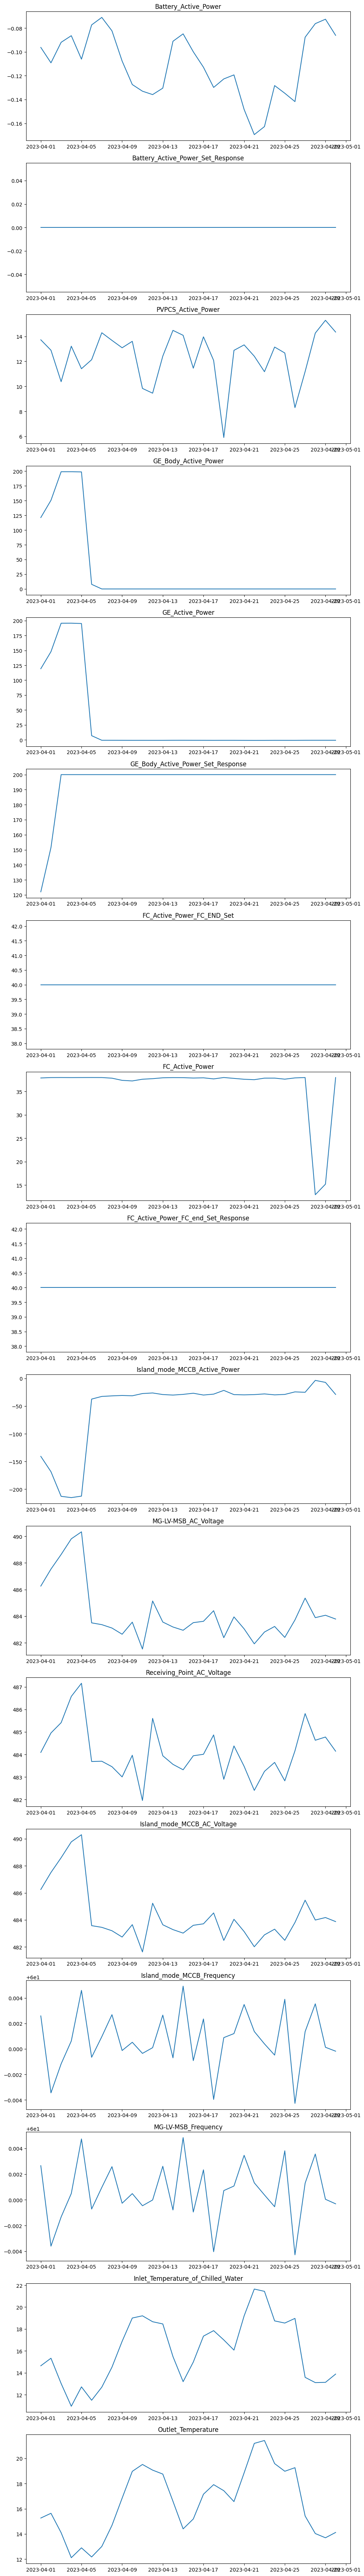

In [16]:
fig,ax=plt.subplots(ncols = 1, nrows = len(list(daily_df.columns)), figsize=(10,70))
i=1
for column in daily_df.columns:
  plt.subplot(len(list(daily_df.columns)),1,i)
  plt.plot(daily_df.index, daily_df[column])
  plt.title(column)
  i+=1
plt.tight_layout()
plt.show()

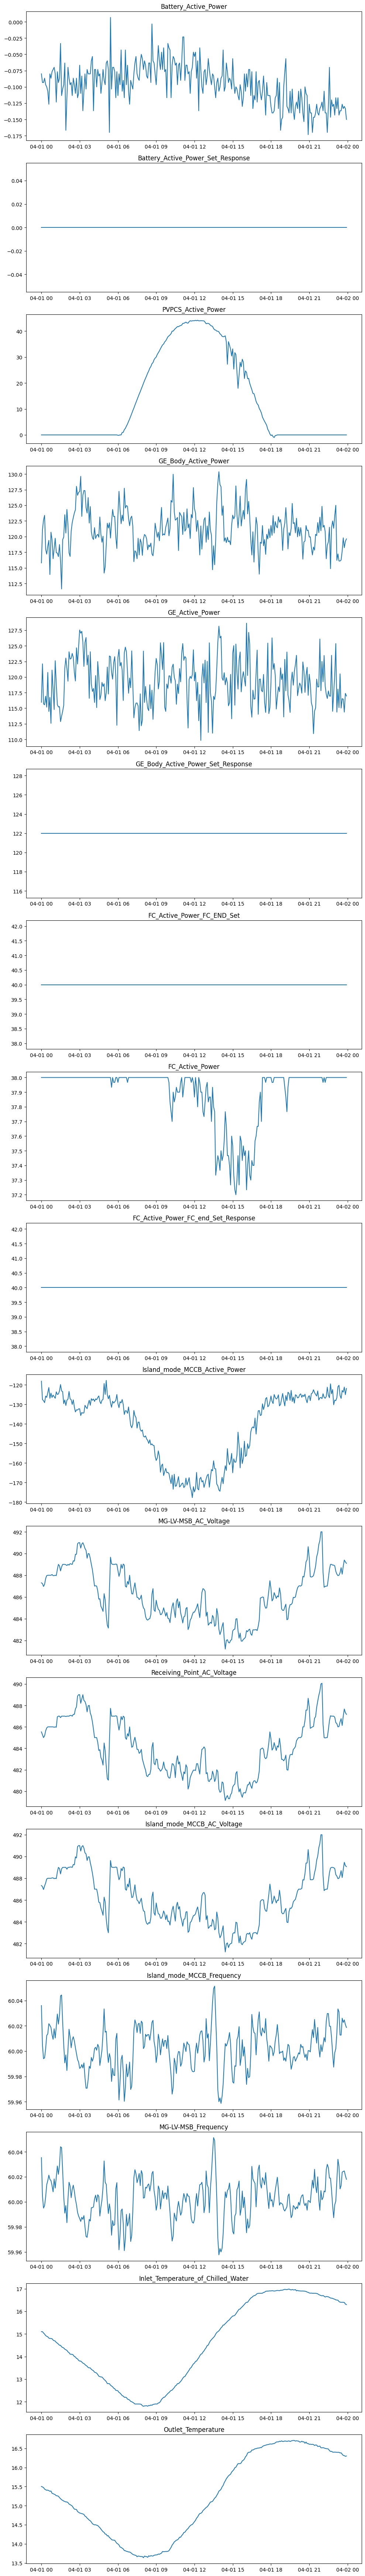

In [17]:
april_one_df=df.iloc[:8640]
minute_df = april_one_df.resample("5min").mean()
fig,ax=plt.subplots(ncols = 1, nrows = len(list(minute_df.columns)), figsize=(10,70))
i=1
for column in minute_df.columns:
  plt.subplot(len(list(minute_df.columns)),1,i)
  plt.plot(minute_df.index, minute_df[column])
  plt.title(column)
  i+=1
plt.tight_layout()
plt.show()